### The dataset for this project is taken from : https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

#### Description of the dataset

* Reviews from Oct 1999 - Oct 2012
* 568,454 reviews
* 256,059 users
* 74,258 products
* 260 users with > 50 reviews

#### Columns Description

* ProductId   => Unique identifier for the product
* UserId      => Unqiue identifier for the user
* ProfileName => Profile name of the user
* HelpfulnessNumerator   => Number of users who found the review helpful
* HelpfulnessDenominator => Number of users who indicated whether they found the review helpful or not
* Score    =>  Rating between 1 and 5
* Time     => Timestamp for the review
* Summary  => Brief summary of the review
* Text     => Text of the review


In [1]:
# importing essential libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# loading data into dataframe and looking intp top 5 rows
df = pd.read_csv('dataset/Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
# nums of rows and cols of data
df.shape

(568454, 10)

In [4]:
# Basic information of our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


We can see there are some missing values in profile name and summary columns. To get how many values are missing in each
columns we can use isna and sum

In [5]:
# printing null counts
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# Data Cleaning

Drop values with null as we have plenty of data

In [6]:
df.dropna(inplace=True)
df.shape

(568401, 10)

In [7]:
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

Now we can see there are no missing values in our data.
<hr>

* HelpfulnessNumerator => Number of users who found the review helpful
* HelpfulnessDenominator => Number of users who indicated whether they found the review helpful or not

checking if there is more number in HelpfulnessNumerator than in HelpfulnessDenominator. If there is then the information is wrong.

In [8]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [9]:
# Only selecting the correct observation which has HelpfulnessNumerator less than or equal to HelpfulnessDenominator
df = df[df['HelpfulnessNumerator'] <= df['HelpfulnessDenominator']]
df.shape

(568399, 10)

### Checking for duplicate values

In [10]:
#code to check if there are repeating values in given subset

#df[df.duplicated(['UserId', 'ProfileName', 'Time', 'Summary', 'Text'])]

In [11]:
df = df.drop_duplicates(subset={"UserId", "ProfileName", "Time", "Text"}, keep="first", inplace=False)
df.shape

(393912, 10)

### converting "score" feature to positive or negetive

In [12]:
df.groupby('Score').count()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text
Score,,,,,,,,,
1,36303,36303,36303,36303,36303,36303,36303,36303,36303
2,20800,20800,20800,20800,20800,20800,20800,20800,20800
3,29767,29767,29767,29767,29767,29767,29767,29767,29767
4,56092,56092,56092,56092,56092,56092,56092,56092,56092
5,250950,250950,250950,250950,250950,250950,250950,250950,250950


<Axes: xlabel='Score', ylabel='count'>

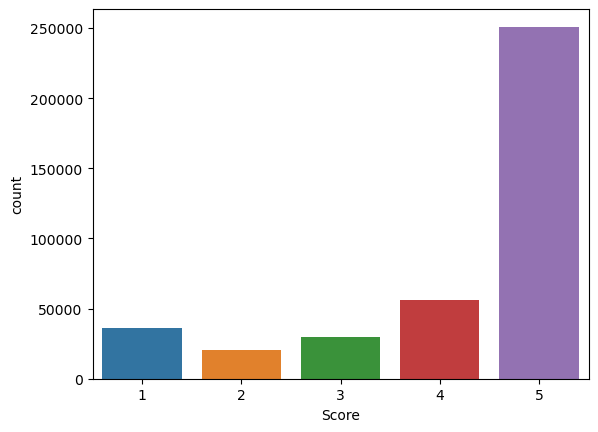

In [13]:
sns.countplot(df, x='Score')

In [14]:
# classifing sebtiment as positive/1 if the score is greater than 3
df['sentiment'] = df['Score'].apply(lambda x: 1 if x > 3 else 0)

In [15]:
df.groupby('sentiment').count()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
sentiment,,,,,,,,,,
0,86870,86870,86870,86870,86870,86870,86870,86870,86870,86870
1,307042,307042,307042,307042,307042,307042,307042,307042,307042,307042


<Axes: xlabel='sentiment', ylabel='count'>

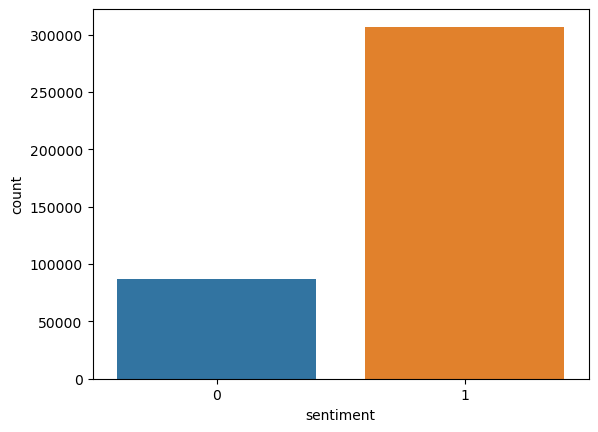

In [16]:
sns.countplot(df, x='sentiment')

In [31]:
new_df = df[df['Score'] != 4]

In [32]:
new_df.groupby('sentiment').count()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
sentiment,,,,,,,,,,
0,86870,86870,86870,86870,86870,86870,86870,86870,86870,86870
1,250950,250950,250950,250950,250950,250950,250950,250950,250950,250950


<Axes: xlabel='sentiment', ylabel='count'>

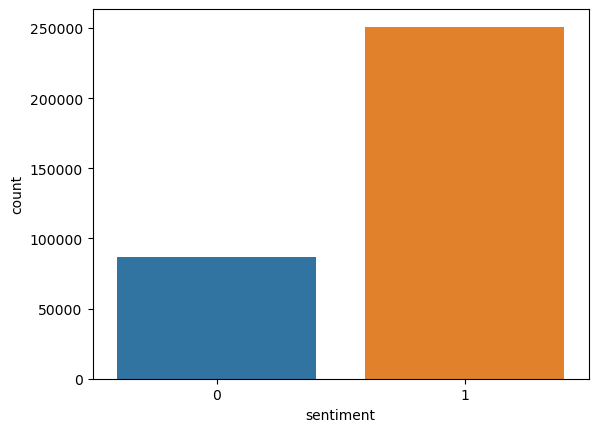

In [33]:
sns.countplot(new_df, x='sentiment')

In [34]:
new_df.groupby('sentiment').count()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
sentiment,,,,,,,,,,
0,86870,86870,86870,86870,86870,86870,86870,86870,86870,86870
1,250950,250950,250950,250950,250950,250950,250950,250950,250950,250950


In [35]:
negetive_sentiment_df = new_df[new_df['sentiment'] == 0]
positive_sentiment_df = new_df[new_df['sentiment'] == 1]
positive_sentiment_df = positive_sentiment_df.sample(n=100000)

In [36]:
new_df = pd.concat([positive_sentiment_df, negetive_sentiment_df])

<Axes: xlabel='sentiment', ylabel='count'>

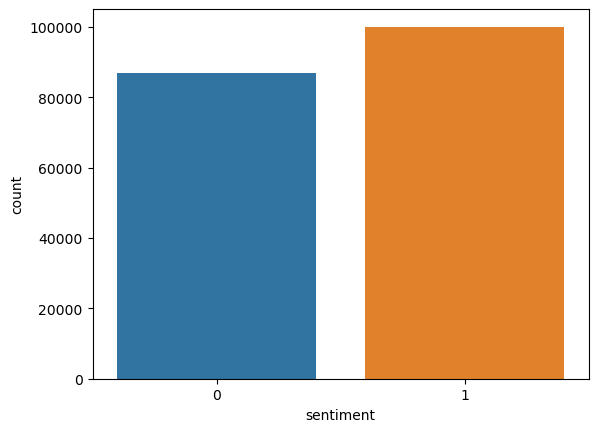

In [37]:
sns.countplot(new_df, x='sentiment')

In [38]:
new_df.to_csv('dataset/cleaned_reviews.csv',sep=",", index=False)